In [2]:
import sys
from pathlib import Path

# Agregar carpeta raíz al path
ROOT = Path.cwd().parent
sys.path.append(str(ROOT))

# Importar funciones del módulo src
from src.preprocess import dicom_to_channels, png_to_3ch, to_hu, window



In [3]:
# Detectar carpeta base y dataset
BASE_DIR = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
DATA_DIR = BASE_DIR / "data"

# Seleccionar algunas rutas
dcm_paths = list((DATA_DIR / "Bleeding").rglob("*.dcm"))
png_paths = list((DATA_DIR / "Normal").rglob("*.png"))

print(f"Encontrados {len(dcm_paths)} DICOM y {len(png_paths)} PNG")
print("Ejemplo DICOM:", dcm_paths[0])
print("Ejemplo PNG:", png_paths[0])


Encontrados 1093 DICOM y 4427 PNG
Ejemplo DICOM: c:\Users\mikae\cttriage\data\Bleeding\DICOM\10002.dcm
Ejemplo PNG: c:\Users\mikae\cttriage\data\Normal\PNG\10000.png


Forma HU: (512, 512)
Rango HU: -2048.0 → 1804.0


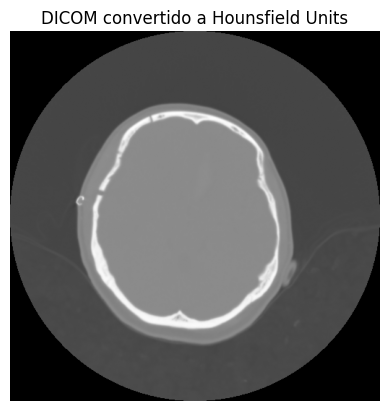

In [4]:
import pydicom

# Leer un DICOM
ds = pydicom.dcmread(dcm_paths[0])
hu = to_hu(ds)

print("Forma HU:", hu.shape)
print("Rango HU:", hu.min(), "→", hu.max())

plt.imshow(hu, cmap='gray')
plt.title("DICOM convertido a Hounsfield Units")
plt.axis('off')
plt.show()


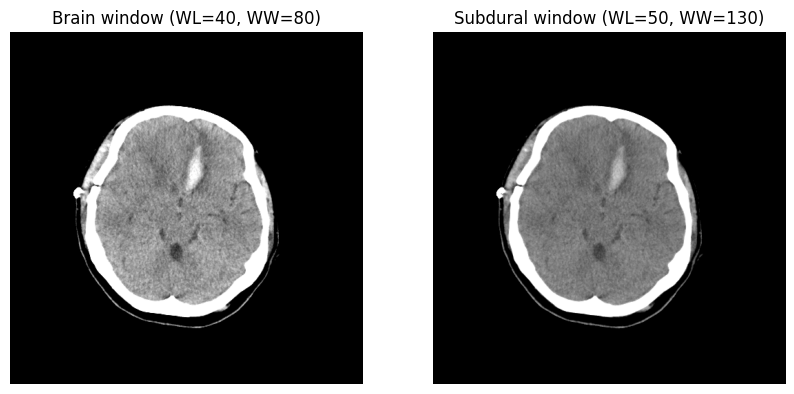

Rangos normalizados:
Brain: 0.0 1.0
Subdural: 0.0 1.0


In [5]:
brain = window(hu, wl=40, ww=80)
subdural = window(hu, wl=50, ww=130)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(brain, cmap='gray')
ax[0].set_title('Brain window (WL=40, WW=80)')
ax[0].axis('off')

ax[1].imshow(subdural, cmap='gray')
ax[1].set_title('Subdural window (WL=50, WW=130)')
ax[1].axis('off')
plt.show()

print("Rangos normalizados:")
print("Brain:", brain.min(), brain.max())
print("Subdural:", subdural.min(), subdural.max())


DICOM → (2, 224, 224) 0.0 1.0


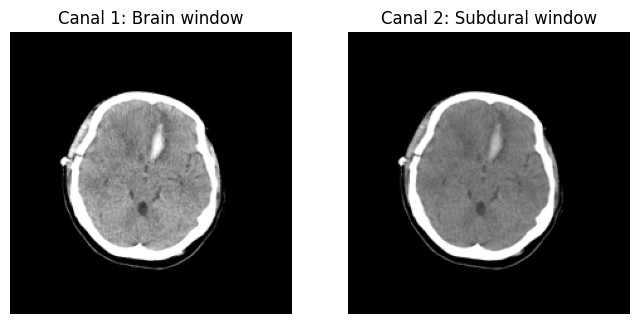

In [6]:
x = dicom_to_channels(dcm_paths[0])
print("DICOM →", x.shape, x.min(), x.max())

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(x[0], cmap='gray')
plt.title("Canal 1: Brain window")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(x[1], cmap='gray')
plt.title("Canal 2: Subdural window")
plt.axis('off')
plt.show()


PNG → (3, 224, 224) 0.0 1.0


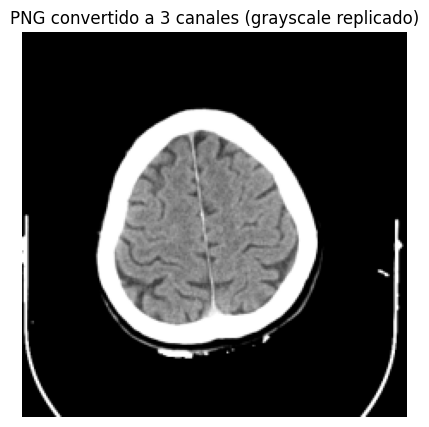

In [7]:
y = png_to_3ch(png_paths[0])
print("PNG →", y.shape, y.min(), y.max())

plt.figure(figsize=(5,5))
plt.imshow(y[0], cmap='gray')
plt.title("PNG convertido a 3 canales (grayscale replicado)")
plt.axis('off')
plt.show()


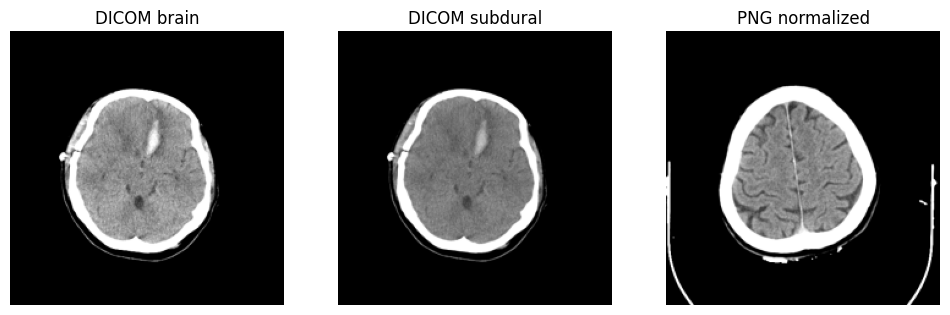

In [8]:
fig, ax = plt.subplots(1,3, figsize=(12,4))

ax[0].imshow(x[0], cmap='gray')
ax[0].set_title('DICOM brain')

ax[1].imshow(x[1], cmap='gray')
ax[1].set_title('DICOM subdural')

ax[2].imshow(y[0], cmap='gray')
ax[2].set_title('PNG normalized')

for a in ax: a.axis('off')
plt.show()


Found 1130 DICOMs in Ischemia
Using DICOM: c:\Users\mikae\cttriage\data\Ischemia\DICOM\10164.dcm
HU range: -3024.0 → 1846.0


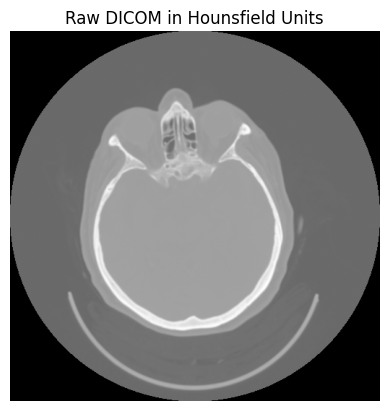

In [47]:
import pydicom
import matplotlib.pyplot as plt
from pathlib import Path
from src.preprocess import to_hu, window

# --- Load a different DICOM ---
DATA_DIR = Path.cwd().parent / "data"

# 🟢 Try a different subset (you can change "Bleeding" → "Ischemia" or "Normal")
dcm_paths = list((DATA_DIR / "Ischemia").rglob("*.dcm"))
print(f"Found {len(dcm_paths)} DICOMs in Ischemia")

# 📸 Pick another index (e.g., the 5th image)
dcm_path = dcm_paths[23]
print("Using DICOM:", dcm_path)

# --- Convert to Hounsfield Units ---
ds = pydicom.dcmread(dcm_path)
hu = to_hu(ds)

print("HU range:", hu.min(), "→", hu.max())

plt.imshow(hu, cmap='gray')
plt.title("Raw DICOM in Hounsfield Units")
plt.axis('off')
plt.show()


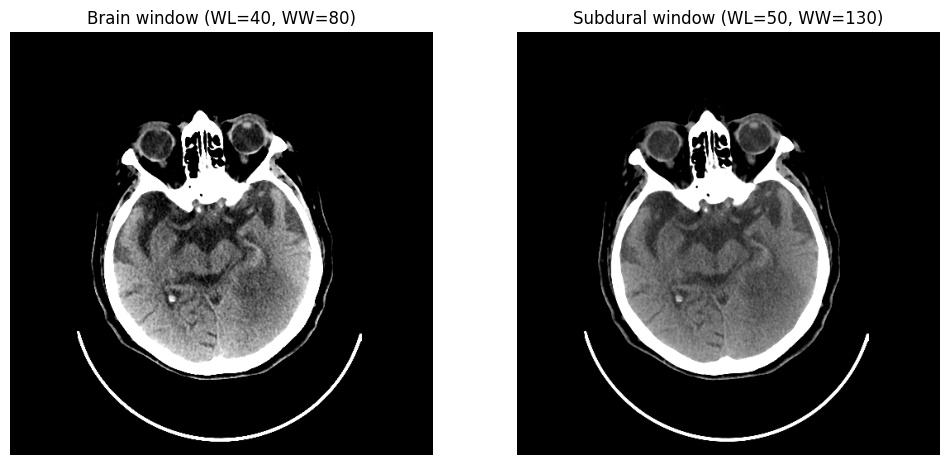

In [48]:
# Apply both windows
brain = window(hu, wl=40, ww=80)
subdural = window(hu, wl=50, ww=130)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(brain, cmap='gray')
ax[0].set_title("Brain window (WL=40, WW=80)")
ax[0].axis('off')

ax[1].imshow(subdural, cmap='gray')
ax[1].set_title("Subdural window (WL=50, WW=130)")
ax[1].axis('off')
plt.show()


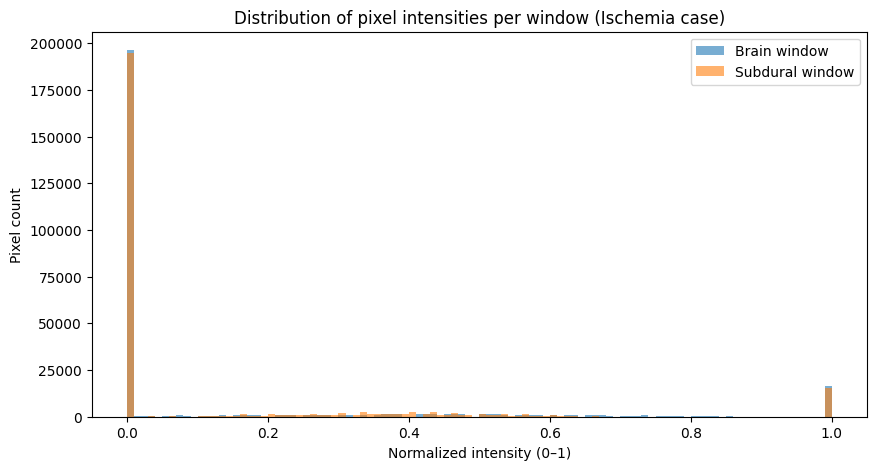

In [49]:
plt.figure(figsize=(10,5))
plt.hist(brain.ravel(), bins=100, alpha=0.6, label='Brain window')
plt.hist(subdural.ravel(), bins=100, alpha=0.6, label='Subdural window')
plt.xlabel("Normalized intensity (0–1)")
plt.ylabel("Pixel count")
plt.legend()
plt.title("Distribution of pixel intensities per window (Ischemia case)")
plt.show()



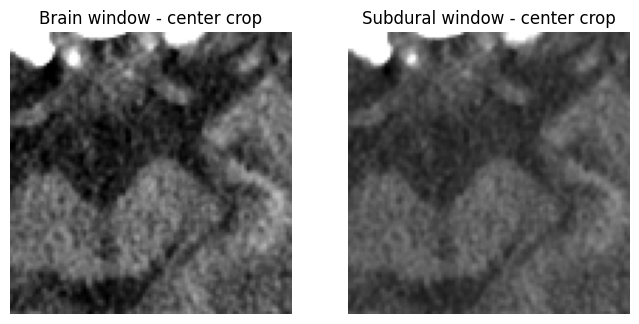

In [50]:
h, w = hu.shape
crop = slice(h//2 - 50, h//2 + 50)
brain_crop = brain[crop, crop]
sub_crop = subdural[crop, crop]

fig, ax = plt.subplots(1, 2, figsize=(8,4))
ax[0].imshow(brain_crop, cmap='gray')
ax[0].set_title("Brain window - center crop")
ax[1].imshow(sub_crop, cmap='gray')
ax[1].set_title("Subdural window - center crop")
for a in ax: a.axis('off')
plt.show()
